Instructions for updating:
Colocations handled automatically by placer.
(50, 2)
(50, 1)
iteration times: 0
W: [[0.8409361 ]
 [0.03310433]] b: [0.00802239] loss: 1332.738
Test loss: 1758.5896

iteration times: 100000
W: [[  7.453762]
 [-73.18062 ]] b: [9.454086] loss: 2.8593075
Test loss: 2.1413863

iteration times: 200000
W: [[  7.3798237]
 [-73.11874  ]] b: [17.063574] loss: 2.2794223
Test loss: 1.8773631

iteration times: 300000
W: [[  7.3128347]
 [-73.04189  ]] b: [23.845835] loss: 1.8187056
Test loss: 1.6739111

iteration times: 400000
W: [[  7.2531986]
 [-72.973495 ]] b: [29.883635] loss: 1.453113
Test loss: 1.5227982

iteration times: 500000
W: [[  7.199967]
 [-72.91244 ]] b: [35.273125] loss: 1.1622272
Test loss: 1.4118174

iteration times: 600000
W: [[  7.152673]
 [-72.858055]] b: [40.06044] loss: 0.9318827
Test loss: 1.3320265

iteration times: 700000
W: [[  7.1101937]
 [-72.809326 ]] b: [44.361214] loss: 0.74744684
Test loss: 1.2755812

iteration times: 800000
W: [[  7.072529

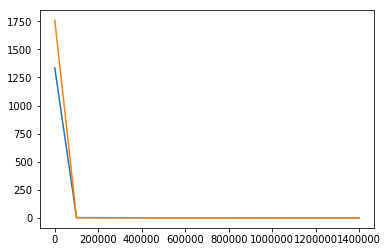

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Try to find value for W and b to compute y_data = x_data * W + b  

# Model parameters
W = tf.Variable(tf.zeros([2, 1], tf.float32), name="weights")
b = tf.Variable(tf.zeros([1], tf.float32), name="biases")

# Model input and output
x = tf.placeholder(tf.float32, shape=[None, 2])
y = tf.placeholder(tf.float32, shape=[None, 1])

# hypothesis
linear_regression_model = tf.add(tf.matmul(x, W), b)
# cost/loss function
loss = tf.reduce_mean(tf.square(linear_regression_model - y)) / 100

# optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(loss)

training_filename = "dataForTraining.txt"
testing_filename = "dataForTesting.txt"
training_dataset = np.loadtxt("dataForTraining.txt")
testing_dataset = np.loadtxt("dataForTesting.txt")
x_train = np.array(training_dataset[:,:2])
y_train = np.array(training_dataset[:,2:3])
x_test = np.array(testing_dataset[:,:2])
y_test = np.array(testing_dataset[:,2:3])
print(x_train.shape)
print(y_train.shape)

save_step_loss = {"step":[],"train_loss":[],"test_loss":[]}# 保存step和loss用于可视化操作

init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)  # reset values to wrong
    steps = 1500000
    for i in range(steps):
        sess.run(train, {x: x_train, y: y_train})
        if i % 100000 == 0:
            # evaluate training accuracy
            print("iteration times: %s" % i)
            curr_W, curr_b, curr_train_loss = sess.run([W, b, loss], {x: x_train, y: y_train})
            print("W: %s b: %s loss: %s" % (curr_W, curr_b, curr_train_loss))
            # Accuracy computation
            curr_test_loss = sess.run(loss,{x:x_test,y:y_test})
            print("Test loss: %s\n" % curr_test_loss)
            save_step_loss["step"].append(i)
            save_step_loss["train_loss"].append(curr_train_loss)
            save_step_loss["test_loss"].append(curr_test_loss)

#画图损失函数变化曲线
plt.plot(save_step_loss["step"],save_step_loss["train_loss"],save_step_loss["step"],save_step_loss["test_loss"])
plt.show()

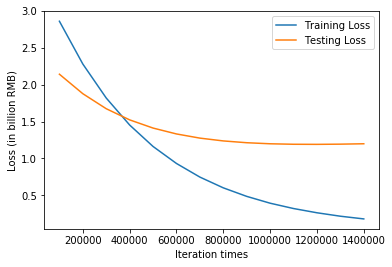

In [10]:
#画图损失函数变化曲线
plt.plot(save_step_loss["step"][1:],save_step_loss["train_loss"][1:],label='Training Loss')
plt.xlabel('Iteration times')
plt.ylabel('Loss (in billion RMB)')
plt.plot(save_step_loss["step"][1:],save_step_loss["test_loss"][1:],label='Testing Loss')
plt.legend()
plt.show()